In [42]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [152]:
# CUPED article
# https://exp-platform.com/Documents/2013-02-CUPED-ImprovingSensitivityOfControlledExperiments.pdf

In [139]:
N_SAMPLES = 800

In [140]:
np.random.seed(10)

df = pd.DataFrame({'x': np.random.uniform(-10, 10, N_SAMPLES) + 50})
df['y'] = df['x'] * 1.5 + np.random.uniform(-15, 15, N_SAMPLES)

df['binary'] = 0
df.loc[range(int(N_SAMPLES / 2)), 'binary'] = 1
df = df.sample(frac=1, random_state=10).reset_index(drop=True)

df['period'] = 'post'
df.loc[range(int(N_SAMPLES / 2)), 'period'] = 'pre'

df.loc[(df['binary'] == 1) & (df['period'] == 'post'), 'y'] = \
df.loc[(df['binary'] == 1) & (df['period'] == 'post'), 'y'] * 1.05  # add treatment effect

np.corrcoef(df['y'], df['x'])

array([[1.        , 0.71977773],
       [0.71977773, 1.        ]])

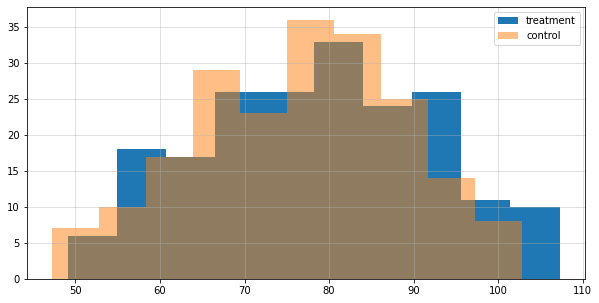

In [141]:
plt.figure(figsize=(10, 5))
plt.hist(df[(df.binary == 1) & (df['period'] == 'post')]['y'], label='treatment')
plt.hist(df[(df.binary == 0) & (df['period'] == 'post')]['y'], alpha=0.5, label='control')
plt.legend()
plt.grid(alpha=0.5);

In [142]:
ttest_ind(df[df.binary == 1]['y'], df[df.binary == 0]['y'])

Ttest_indResult(statistic=1.0490024396553965, pvalue=0.2944945854218194)

In [149]:
thetha = np.cov(df[df['period'] == 'pre']['x'], 
                df[df['period'] == 'pre']['y'])[0, 1] / df['x'].var()
x_mean = df[df['period'] == 'pre']['x'].mean()

df['y_cuped'] = df['y'] - thetha * df['x'] + x_mean

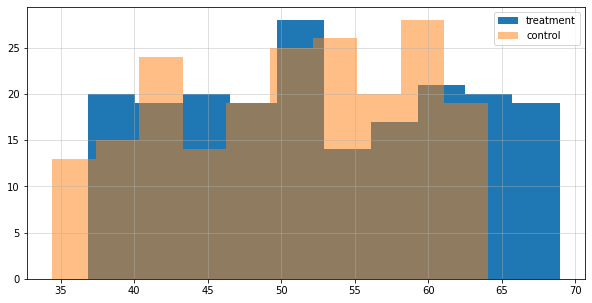

In [150]:
plt.figure(figsize=(10, 5))
plt.hist(df[(df.binary == 1) & (df['period'] == 'post')]['y_cuped'], label='treatment')
plt.hist(df[(df.binary == 0) & (df['period'] == 'post')]['y_cuped'], alpha=0.5, label='control')
plt.legend()
plt.grid(alpha=0.5);

In [151]:
# WOW test has found stat sagnificant effect
ttest_ind(df[df.binary == 1]['y_cuped'], df[df.binary == 0]['y_cuped'])

Ttest_indResult(statistic=2.3862383616591036, pvalue=0.017253890100645607)